## DATA PREPARATION

In [52]:
import pandas as pd

In [53]:
file_path = 'Porto/players.csv'
data = pd.read_csv(file_path)

In [54]:
data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "head": data.head()
}

data_info

{'shape': (32392, 23),
 'columns': ['player_id',
  'first_name',
  'last_name',
  'name',
  'last_season',
  'current_club_id',
  'player_code',
  'country_of_birth',
  'city_of_birth',
  'country_of_citizenship',
  'date_of_birth',
  'sub_position',
  'position',
  'foot',
  'height_in_cm',
  'contract_expiration_date',
  'agent_name',
  'image_url',
  'url',
  'current_club_domestic_competition_id',
  'current_club_name',
  'market_value_in_eur',
  'highest_market_value_in_eur'],
 'head':    player_id first_name     last_name                name  last_season  \
 0         10   Miroslav         Klose      Miroslav Klose         2015   
 1         26      Roman  Weidenfeller  Roman Weidenfeller         2017   
 2         65    Dimitar      Berbatov    Dimitar Berbatov         2015   
 3         77        NaN         Lúcio               Lúcio         2012   
 4         80        Tom        Starke          Tom Starke         2017   
 
    current_club_id         player_code    country_of

In [55]:
# Check missing values
missing_values = data.isnull().sum()

In [56]:
# Checking data types 
data_types = data.dtypes

In [57]:
# Statistik numerical
summary_statistics = data.describe()

missing_values, data_types, summary_statistics

(player_id                                   0
 first_name                               2062
 last_name                                   0
 name                                        0
 last_season                                 0
 current_club_id                             0
 player_code                                 0
 country_of_birth                         2812
 city_of_birth                            2470
 country_of_citizenship                    380
 date_of_birth                              47
 sub_position                              192
 position                                    0
 foot                                     2591
 height_in_cm                             2345
 contract_expiration_date                12141
 agent_name                              16020
 image_url                                   0
 url                                         0
 current_club_domestic_competition_id        0
 current_club_name                           0
 market_value

## MODELING

In [24]:
data_cleaned = data.dropna(subset=['market_value_in_eur'])

In [25]:
data_cleaned['date_of_birth'] = pd.to_datetime(data_cleaned['date_of_birth'], errors='coerce')
data_cleaned['contract_expiration_date'] = pd.to_datetime(data_cleaned['contract_expiration_date'], errors='coerce')

/tmp/ipykernel_536070/385268799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date_of_birth'] = pd.to_datetime(data_cleaned['date_of_birth'], errors='coerce')
/tmp/ipykernel_536070/385268799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contract_expiration_date'] = pd.to_datetime(data_cleaned['contract_expiration_date'], errors='coerce')


In [26]:
median_height = data_cleaned['height_in_cm'].median()
data_cleaned['height_in_cm'].fillna(median_height, inplace=True)

/tmp/ipykernel_536070/3909721604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['height_in_cm'].fillna(median_height, inplace=True)
/tmp/ipykernel_536070/3909721604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['height_in_cm'].fillna(median_height, inplace=True)


In [27]:
data_cleaned['foot'].fillna(data_cleaned['foot'].mode()[0], inplace=True)

/tmp/ipykernel_536070/1972729010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['foot'].fillna(data_cleaned['foot'].mode()[0], inplace=True)
/tmp/ipykernel_536070/1972729010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['foot'].fillna(data_cleaned['foot'].mode()[0], inplace=True)


In [28]:
missing_after_cleaning = data_cleaned.isnull().sum()

missing_after_cleaning

player_id                                   0
first_name                               2009
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2155
city_of_birth                            1826
country_of_citizenship                    360
date_of_birth                              32
sub_position                              102
position                                    0
foot                                        0
height_in_cm                                0
contract_expiration_date                11332
agent_name                              14892
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               

## VISUALISASI

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [30]:
sns.set(style="whitegrid")


/tmp/ipykernel_536070/519210006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='country_of_citizenship', data=top_countries, palette='viridis')


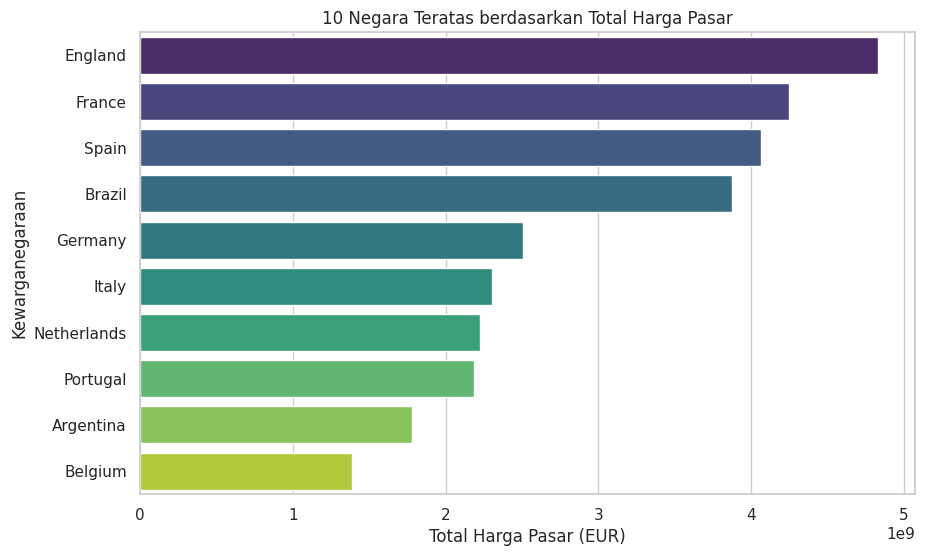

In [44]:
top_countries = data_cleaned.groupby('country_of_citizenship')['market_value_in_eur'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='market_value_in_eur', y='country_of_citizenship', data=top_countries, palette='viridis')
plt.title('10 Negara Teratas berdasarkan Total Harga Pasar')
plt.xlabel('Total Harga Pasar (EUR)')
plt.ylabel('Kewarganegaraan')
plt.show()

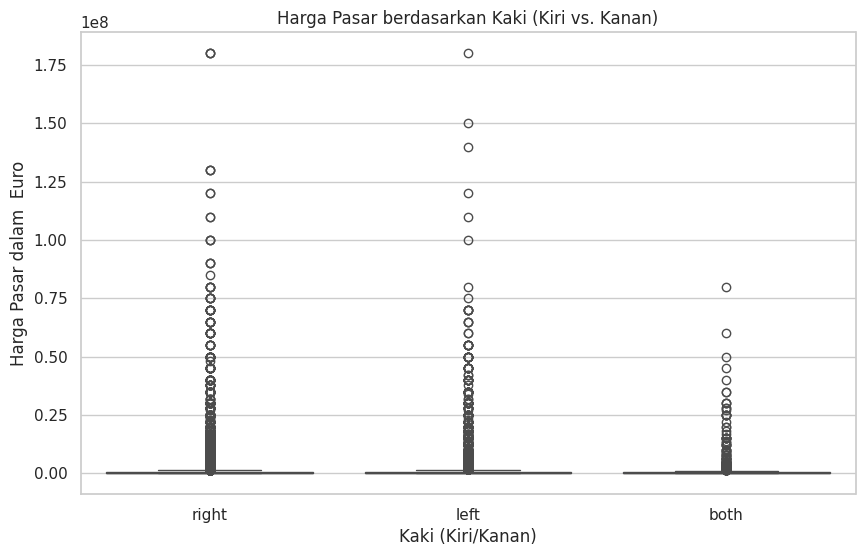

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='foot', y='market_value_in_eur', data=data_cleaned)
plt.title('Harga Pasar berdasarkan Kaki (Kiri vs. Kanan)')
plt.xlabel('Kaki (Kiri/Kanan)')
plt.ylabel('Harga Pasar dalam  Euro')
plt.show()


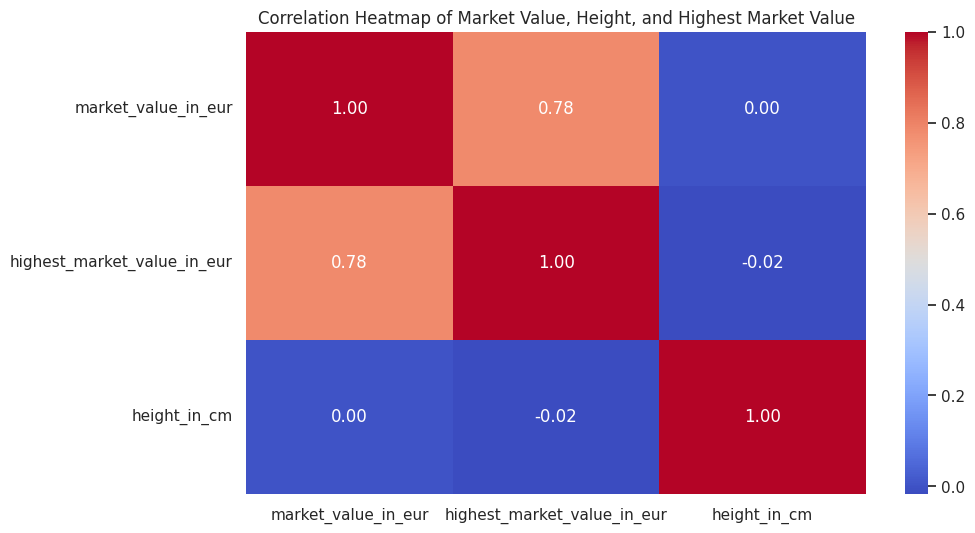

In [41]:
plt.figure(figsize=(10, 6))
correlation_matrix = data_cleaned[['market_value_in_eur', 'highest_market_value_in_eur', 'height_in_cm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Market Value, Height, and Highest Market Value')
plt.show()

/tmp/ipykernel_536070/1863620163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='name', data=top_10_players, palette='Blues_r')


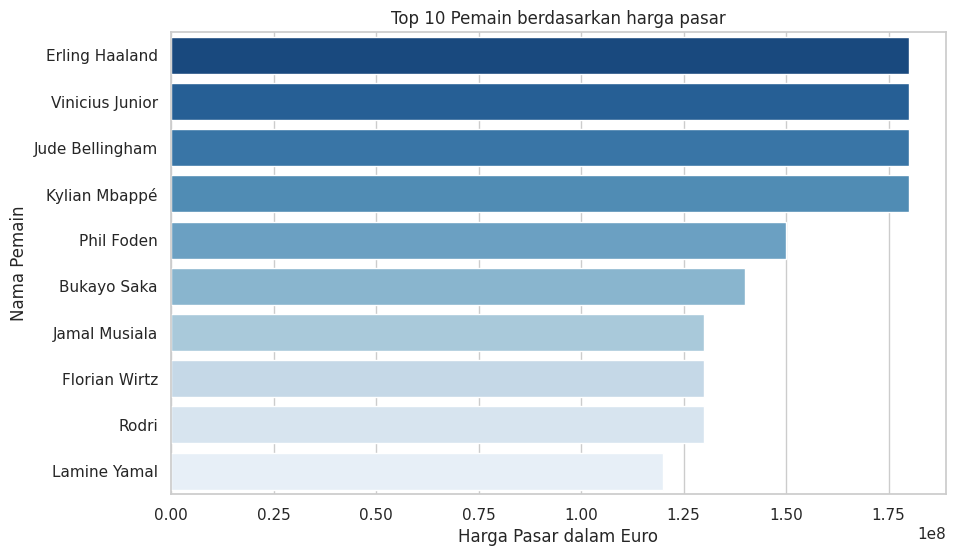

In [38]:
top_10_players = data_cleaned[['name', 'market_value_in_eur']].sort_values(by='market_value_in_eur', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='market_value_in_eur', y='name', data=top_10_players, palette='Blues_r')
plt.title('Top 10 Pemain berdasarkan harga pasar')
plt.xlabel('Harga Pasar dalam Euro')
plt.ylabel('Nama Pemain')
plt.show()


In [46]:
#Deteksi Outlier (metode IQR) untuk Nilai Pasar dan Tinggi
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_market_value = detect_outliers_iqr(data_cleaned, 'market_value_in_eur')
outliers_height = detect_outliers_iqr(data_cleaned, 'height_in_cm')

outliers_market_value.shape, outliers_height.shape

((4210, 23), (132, 23))

In [47]:
#regressi
data_cleaned['age'] = 2024 - pd.DatetimeIndex(data_cleaned['date_of_birth']).year  # Calculate player age
features = data_cleaned[['height_in_cm', 'age']].dropna()
target = data_cleaned.loc[features.index, 'market_value_in_eur']


/tmp/ipykernel_536070/2345824549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age'] = 2024 - pd.DatetimeIndex(data_cleaned['date_of_birth']).year  # Calculate player age


In [48]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [49]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Prediksi and evaluasi model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(2111414.918919253, 0.018572943972137823)